Parameter estimations:  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/LorenzParameterEstimation.ipynb  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/LotkaVolterraParameterEstimation.ipynb  
http://nbviewer.jupyter.org/github/JuliaDiffEq/DiffEqBenchmarks.jl/blob/master/ParameterEstimation/DiffEqBayesLotkaVolterra.ipynb  

DiffEqBayes code:  
https://github.com/JuliaDiffEq/DiffEqBayes.jl/blob/master/src/dynamichmc_inference.jl  

Gradient:  
https://github.com/tpapp/DiffWrappers.jl  
http://docs.juliadiffeq.org/latest/analysis/sensitivity.html  

Set up a ODE problem (a Lotka Volterra model)

In [ ]:
using DifferentialEquations, ParameterizedFunctions, ODE, ODEInterfaceDiffEq, LSODA

f = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
using Plots; gr()

┌ Info: Recompiling stale cache file /home/junpenglao/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/junpenglao/.julia/compiled/v1.0/ODE/yzDex.ji for ODE [c030b06c-0b6d-57c2-b091-7029874bd033]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/junpenglao/.julia/compiled/v1.0/ODEInterfaceDiffEq/moI7w.ji for ODEInterfaceDiffEq [09606e27-ecf5-54fc-bb29-004bd9f985bf]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/junpenglao/.julia/compiled/v1.0/LSODA/HNvAI.ji for LSODA [7f56f5a3-f504-529b-bc02-0b1fe5e64312]
└ @ Base loading.jl:1187


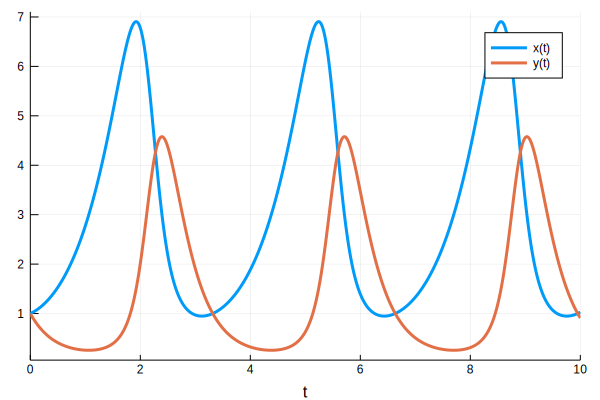

In [2]:
sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
plot(sol)

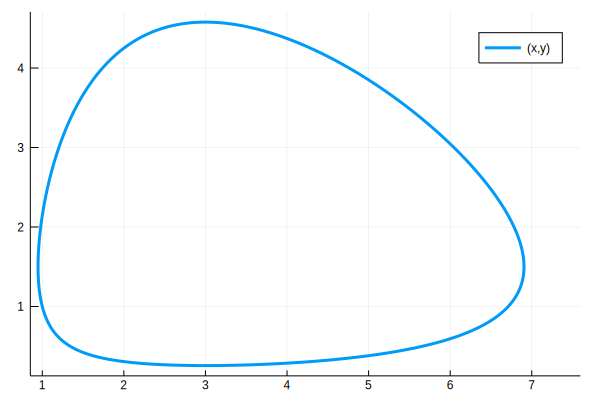

In [3]:
plot(sol,vars=(1,2))

Change parameter and generate dynamic (i.e., solving the ODE)

In [4]:
prob2 = problem_new_parameters(prob, [1.0,1.5,3.0,1.0])
sol = solve(prob2, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 31-element Array{Float64,1}:
  0.0                
  0.07841662821262387
  0.21420305325045946
  0.38497277694781407
  0.5973598343433976 
  0.8455659320698774 
  1.1510249322567272 
  1.520903436732848  
  1.8726882803100526 
  2.32860756698483   
  2.890360179055428  
  3.1877279029556687 
  3.4694942311592643 
  ⋮                  
  5.945797976051196  
  6.3897332918769125 
  7.057019124054154  
  7.3693155856655554 
  7.676863395431463  
  8.011518240187927  
  8.293978392986544  
  8.626185674484162  
  8.99318554003171   
  9.379432857557564  
  9.839502126667867  
 10.0                
u: 31-element Array{Array{Float64,1},1}:
 [1.0, 1.0]          
 [0.970056, 0.853744]
 [0.954551, 0.647086]
 [0.984413, 0.457166]
 [1.08101, 0.300712] 
 [1.26679, 0.190816] 
 [1.60501, 0.117954] 
 [2.20417, 0.078102] 
 [3.01821, 0.0675818]
 [4.52145, 0.0940418]
 [6.71455, 0.421074] 
 [6.37632, 1.28852]  
 [3.79575, 2.380

In [5]:
function problem_new_parameters2(prob::ODEProblem,u0,p;kwargs...)
  uEltype = eltype(p)
  tspan = (uEltype(prob.tspan[1]),uEltype(prob.tspan[2]))
  ODEProblem{isinplace(prob)}(prob.f,u0,tspan,p,prob.problem_type;
  callback = prob.callback, mass_matrix = prob.mass_matrix,
  kwargs...)
end

prob2 = problem_new_parameters2(prob, [1.5,2.], [1.0,1.5,3.0,1.0])
sol = solve(prob2, Tsit5())
plot(sol)

ErrorException: type ODEProblem has no field mass_matrix

In [6]:
function lotkavolterra(du,u,p,t)
 du[1] = p[1]*u[1]-p[2]*u[1]*u[2]
 du[2] = -p[3]*u[2]+p[4]*u[1]*u[2]
end

lotkavolterra (generic function with 1 method)

In [7]:
u0 = [1.0;1.0]
tspan = (0.0,10.0)
prob2 = ODEProblem(lotkavolterra,u0,tspan,p)
sol2 = solve(prob2);

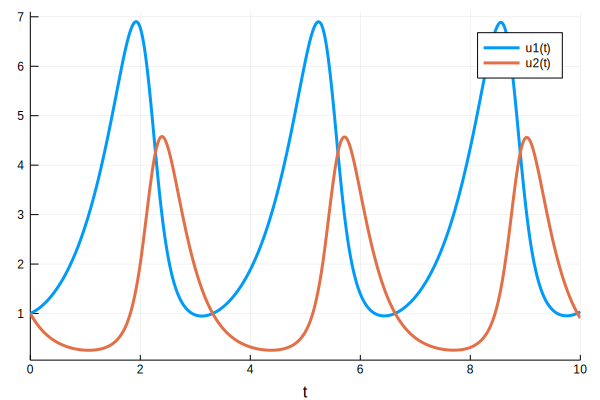

In [8]:
plot(sol2)

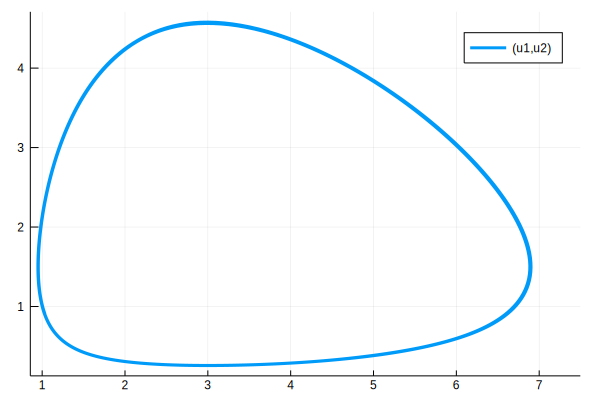

In [9]:
plot(sol2,vars=(1,2))

In [10]:
u0 = [.5, 0.25]
tspan = (0.0,100.0)
p2 = [1.5, 2.5, 1.75, 1.75, 0.01]
prob2 = ODEProblem(lotkavolterra,u0,tspan,p2)
sol2 = solve(prob2,Vern7(),abstol=1/10^14,reltol=1/10^14);

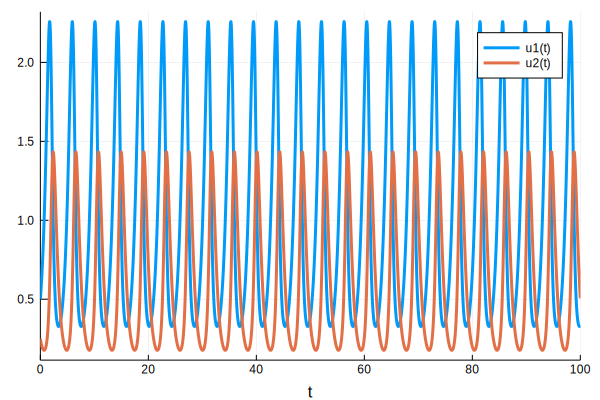

In [11]:
plot(sol2)

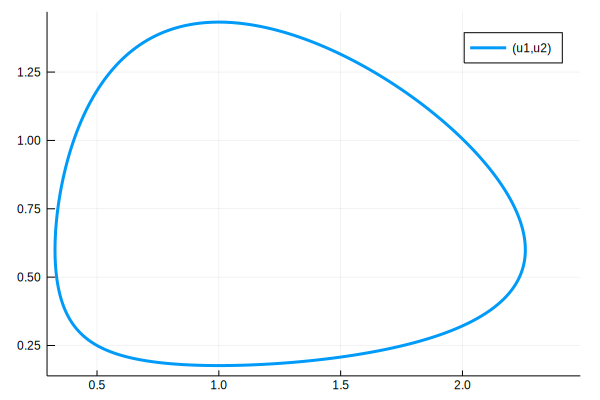

In [12]:
plot(sol2,vars=(1,2))